# Convolutional Neural Network - Multi-Class Classification.
## Upvote & Share if you like it... :)

# Problem Set

We are given a dataset containing 785 columns. Each column contains the pixel value of 28X28(784) gray scale image. 1 extra column is label, which is our target value. We have 10 classes for 0 to 9.
The 10 classes are as follows:
<br/>
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Total 80,000 records are divided into train(60,0000 and test(20000) set. We need to create one convolutional neural network to predict the class for the test set.
* No missing values in this data. So we will not over that part.

**So our target is to create a multi-class classifier**

# Plan of Attack

<ul>
    <li> First we will explore dataset </li>
    <li>Visualize Data </li>
    <li>Prepare Feature & target matrix & Validation data </li>
    <li>Create Convolutional Neural Nework</li>
    <li>Train & Test Model</li>
    <li>Model Evaluation</li>
    <li>Model Improvisation</li>
</ul>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


# Explore Data

In [2]:
df_train = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_train.csv")
df_test = pd.read_csv("/kaggle/input/fashionmnist/fashion-mnist_test.csv")

In [3]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# So we have two dataset for training and testset. first column label is the result column or we can say dependent variable
# or target variable. Our dataset doesnt contain direct images. It contains the pixel values of 28X28 image.

In [6]:
# Unique classes
df_train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [7]:
df_train.shape

(60000, 785)

In [8]:
# As we can see there are 785 column which means 28X28 = 784 + 1 (target column). Our images are in gray scale.

# Data Visualization

In [9]:
# We will create arrays for our training and test set for visualization.
training_arr = np.array(df_train, dtype = 'float32')
testing_arr = np.array(df_test, dtype='float32')

In [10]:
training_arr

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
testing_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 1., 0.],
       [8., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

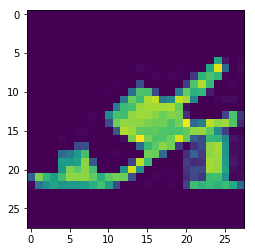

In [12]:
# here we are reshaping because our row is in 1-D array but we need data in 28X28 image shape. So we will reshape it.
plt.imshow(training_arr[50, 1:].reshape((28, 28)) )

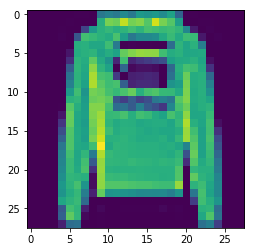

In [13]:
plt.imshow( training_arr[10000,1:].reshape((28,28)) )

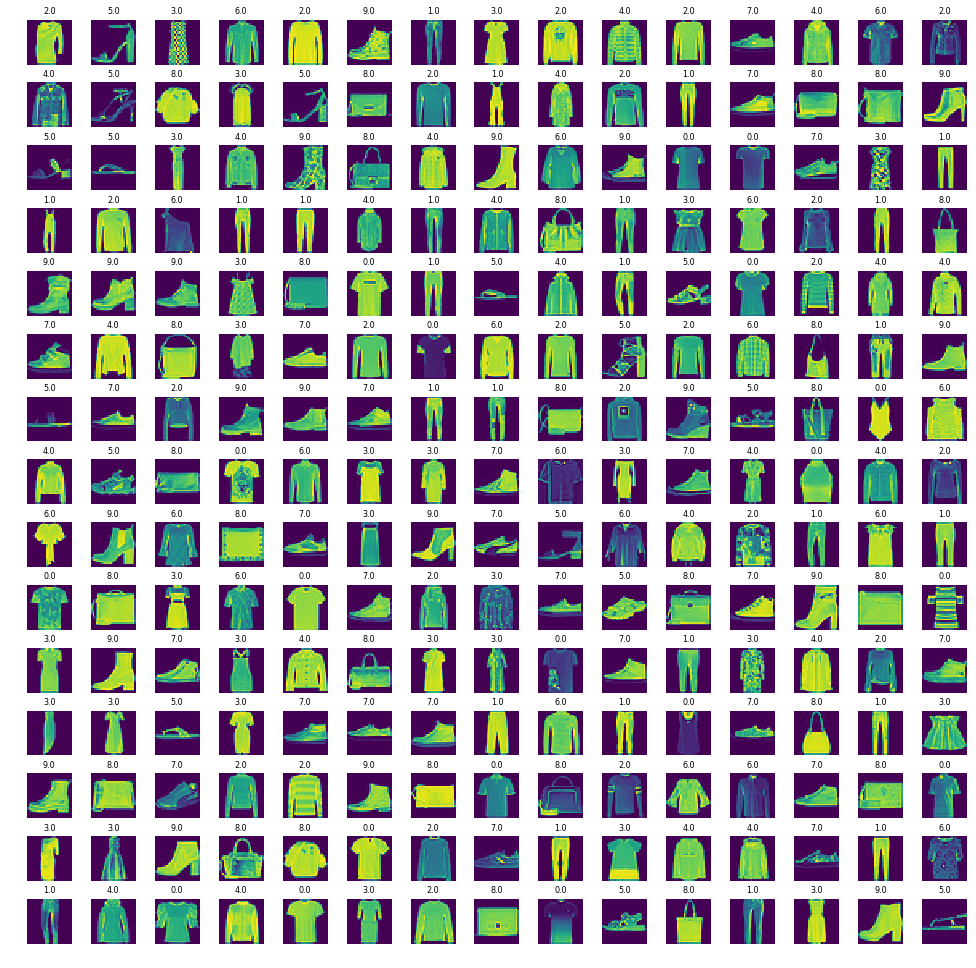

In [14]:
# Lets say we want to see a grid of images.
width = 15
length = 15
fig, axis = plt.subplots(length, width, figsize=(17, 17)) # grid or lengthXwidth(15X15)
axis = axis.ravel() #chaning axis into 1-D array
len_training = len(training_arr)
for i in np.arange(0, width*length):
    index = np.random.randint(0, len_training)
    axis[i].imshow(training_arr[index, 1:].reshape((28, 28)))
    axis[i].set_title(training_arr[index, 0], fontsize=8)
    axis[i].axis("off")
    
plt.subplots_adjust(hspace=0.4) # to maintain horizontal space between images

# Feature & Target Matrix

In [15]:
# Training Set
X_train = training_arr[:, 1:]/255 # divide by 255 just for normalization
y_train = training_arr[:, 0]

In [16]:
# Test Set
X_test = testing_arr[:, 1:]/255
y_test = testing_arr[:, 0]

In [17]:
# check shape of training and test set
print("shape for train X", X_train.shape)
print("shape for test y", y_train.shape)
print("shape for test X", X_test.shape)
print("shape for test y", y_test.shape)

shape for train X (60000, 784)
shape for test y (60000,)
shape for test X (10000, 784)
shape for test y (10000,)


In [18]:
# Everything seems good till now. We have our feature and target matrix.

# Verify Data Distribution

In [19]:
# As we already observer that our trianing dataset contains equal number of samples for all classes. But what if your have only
# one dataset and you create training and test set using train_test_split class. There may be a case your method would majorly
# select data from one particular class. In other words biased sampling like out of 60000 records 40000 records belong to 
# class 1 and other 20,000 belong to remaining classes. In this way your model will be biased toward class 1. 
# So before training our model, we have to take care of our data distribution. In our case its already distributed, still we
# will verify it using visualzation.


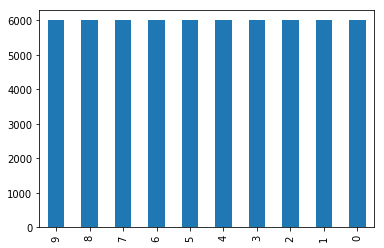

In [20]:
df_train.label.value_counts().plot(kind="bar")
# So our al bars are equal which means a very good distibution. So our data is ready to go.

# Prepare Validation Data

In [21]:
# So we will break our training data into validation data and training dateset. Validation dataset is used while training
# it helps your model to achieve generalization.
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=200)

In [23]:
# Here we got validation data & new train data
print("shape for train X", X_train.shape)
print("shape for test y", y_train.shape)
print("shape for validation X", X_val.shape)
print("shape for validation y", y_val.shape)

shape for train X (48000, 784)
shape for test y (48000,)
shape for validation X (12000, 784)
shape for validation y (12000,)


In [24]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))



# Convolutional Neural Network

In [25]:
# Import - We will use keras library for CNN implementation
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [26]:
clf = Sequential()
# param1 : 32 is number of feature detectors
# param2 & param3 : 3, 3 is the size of feature detector matrix
# param3 : input size is the size of your input(image) which we already know is 28X28
# activation: it sparse all the negative values from your feature matrix.
clf.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation="relu" ))
clf.add(MaxPool2D(pool_size=(2, 2))) # pool_size is the dimension of pool matrix.
clf.add(Flatten())
# outputdim is the number of output from hidden layer. relu does same task as above
clf.add(Dense(output_dim = 32, activation = 'relu')) # hidden layer 1
# it is the output layer, outputdim will always be equal to total number or unique classes.
clf.add(Dense(output_dim = 10, activation = 'sigmoid')) # output layer with 10 classes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if sys.path[0] == '':


In [27]:
# Compile model
clf.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# Train Model

In [28]:
clf.fit(X_train,
       y_train,
       batch_size=100,
       verbose=1,
       validation_data=(X_val, y_val),
       nb_epoch=50)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.5766 - accuracy: 0.7957 - val_loss: 0.4347 - val_accuracy: 0.8482
Epoch 2/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.3699 - accuracy: 0.8700 - val_loss: 0.3535 - val_accuracy: 0.8776
Epoch 3/50
48000/48000 [==============================] - 2s 40us/step - loss: 0.3232 - accuracy: 0.8849 - val_loss: 0.3247 - val_accuracy: 0.8864
Epoch 4/50
48000/48000 [==============================] - 2s 39us/step - loss: 0.2944 - accuracy: 0.8955 - val_loss: 0.2981 - val_accuracy: 0.8938
Epoch 5/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.2750 - accuracy: 0.9024 - val_loss: 0.3075 - val_accuracy: 0.8885
Epoch 6/50
48000/48000 [==============================] - 2s 38us/step - loss: 0.2573 - accuracy: 0.9092 - val_loss: 0.2956 - val_accuracy: 0.8928
Epoch 7/50
48000/48000 [==============================] - 2s 39us/st

In [29]:
# So we can see our model accuracy is 99% 

# Model Evaluation

In [30]:
# Our model performed good in train set. Now lets validate it with test set.
evaluation = clf.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 55us/step
Test Accuracy : 0.913


In [31]:
# So with unseen data or test set its accuracy is 90%, which is also good.

In [32]:
# what are the predicted classes?
predicted_classes = clf.predict_classes(X_test)

In [33]:
predicted_classes # here you can see the test result

array([0, 1, 2, ..., 8, 8, 1])

In [34]:
# Confusion Matrix
# Sum of Diagonal numbers are correct predictions.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
np.fill_diagonal(cm, 0)
print(cm)

[[  0   1  13  22   4   2 114   0  10   0]
 [  1   0   1   1   3   0   1   0   1   0]
 [ 20   2   0  15  78   1  39   0   4   0]
 [ 17  15   9   0  21   0  18   0   1   0]
 [  1   2  25  22   0   0  30   0   4   0]
 [  0   2   0   0   0   0   1  16   2   8]
 [ 76   5  41  37  81   1   0   0   4   1]
 [  0   0   0   0   0   5   0   0   1  29]
 [  3   0   2   2   3   3   6   3   0   0]
 [  1   0   1   0   1   2   0  31   0   0]]


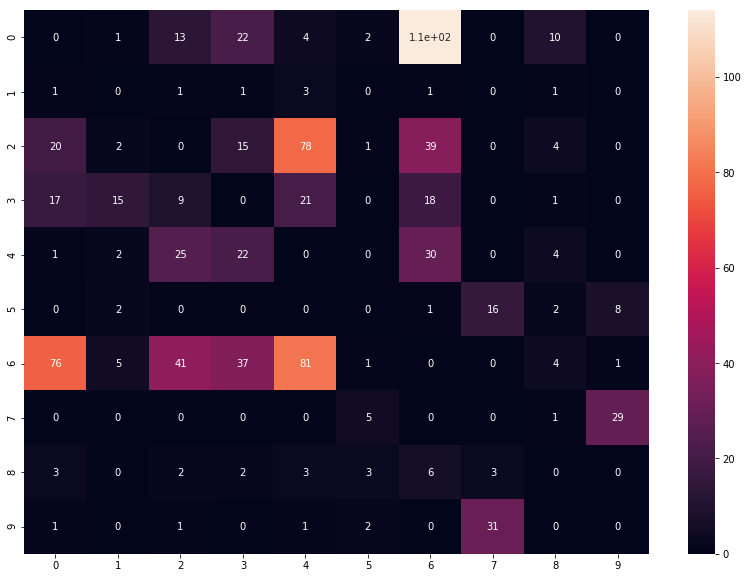

In [35]:
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [36]:
# Prepare classification report for different classes.
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.88      0.83      0.85      1000
     Class 1       0.97      0.99      0.98      1000
     Class 2       0.90      0.84      0.87      1000
     Class 3       0.90      0.92      0.91      1000
     Class 4       0.83      0.92      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.78      0.75      0.77      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.97      0.98      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Model Evaluation

In [37]:
# Our model performed quit good for both training and test set. But if you will see above classification report, you will 
# observer Class 6 prediction is not that good. So you can do little bit experiment wuth your model.
# try to add more CNN layer or change the epoch or change the feature matrix size or max pool size. 

In [38]:
# Thats all we could explain in this model. Like & Share our tutorials.
# Your suggestions and ideas are always welcome.
# Thank You.